<b>Pearson correlation<b>

In [2]:
import pandas as pd
import numpy as np

In [3]:
aire = pd.read_csv("E:\\7mo\\TT1\\Consultas\\Alcaldia-AQI.csv")
crimen = pd.read_csv("E:\\7mo\\TT1\\Datos_aire\\Contaminantes\\csv_modificados\\aire_2011_2020_v6.csv")

In [4]:
df_crimen = pd.DataFrame(crimen)
df_aire = pd.DataFrame(aire)

In [32]:
df_crimen = df_crimen.sort_values(by=['Alcaldia'])
df_aire = df_aire.sort_values(by=['Alcaldia'])

In [36]:
array_aire = df_aire["avgAQI"].values
array_crimen = df_crimen["No de Registros"].values

In [38]:
r = np.corrcoef(array_aire, array_crimen)

In [39]:
r

array([[1.     , 0.16643],
       [0.16643, 1.     ]])

<i>corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients.<i>

<b>Person, Spearman and Kendall correlation using SciPy<b>

In [44]:
import scipy.stats

In [49]:
scipy.stats.pearsonr(array_aire, array_crimen)    # Pearson's r

(0.1664299957653169, 0.5695897386272979)

In [46]:
scipy.stats.spearmanr(array_aire, array_crimen)   # Spearman's rho

SpearmanrResult(correlation=-0.013215891090228608, pvalue=0.9642345819705558)

In [48]:
scipy.stats.kendalltau(array_aire, array_crimen)  # Kendall's tau

KendalltauResult(correlation=0.033335391137041405, pvalue=0.8691572065912958)

r, p = scipy.stats.pearsonr(x, y)

<b>Linear Regretion<b>

In [50]:
result = scipy.stats.linregress(array_aire, array_crimen)

In [51]:
result.pvalue

0.5695897386272979

In [52]:
scipy.stats.linregress(array_aire, array_crimen)

LinregressResult(slope=561.0017001448272, intercept=21295.56841508721, rvalue=0.16642999576531692, pvalue=0.5695897386272979, stderr=959.4941497410213, intercept_stderr=42890.72238113488)

<b>Visualization<b>

In [53]:
slope, intercept, r, p, stderr = scipy.stats.linregress(array_aire, array_crimen)

In [58]:
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}'
line

'Regression line: crimen = 21295.57 + 561.00aire, r=0.17'

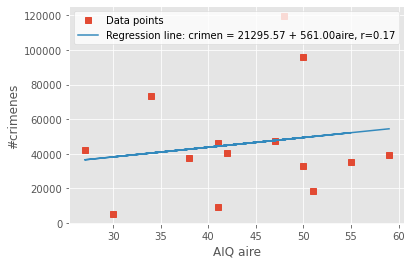

In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.plot(array_aire, array_crimen, linewidth=0, marker='s', label='Data points')
ax.plot(array_aire, intercept + slope * array_aire, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()
